# Exercise 4.9 Part 2

## Contents

#### 01. Import libraries and data
#### 02. Create sample subset of data
#### 03. Create charts
#### 04. Create a histogram of “order_hour_of_day” column
#### 05. Create a bar chart from the “loyalty_flag” column
#### 06. Create a line chart of prices by order_hour_of_day
#### 07. Create a line chart of number_of_dependants by age
#### 08. Create a scatterplot of income by age
#### 09. Export data

## 01. Import libraries and data

In [5]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [6]:
# Import data

ords_prods_cust = pd.read_pickle(r'C:\Users\lrutl\OneDrive\Desktop\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_cust.pkl')

In [7]:
path = r'C:\Users\lrutl\OneDrive\Desktop\Python Fundamentals for Data Analysts\Instacart Basket Analysis'

In [8]:
# Check data import

ords_prods_cust.head()

,order_id,customer_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,average_days_since_prior_order,customer_frequency,First Name,Last Name,Gender,State,Age,number_of_dependants,fam_status,income
0,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
1,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
2,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
3,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
4,3367565,1,6,2,7,19.0,196,1,1,Soda,...,20.259259,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423


In [9]:
# Check data import shape

ords_prods_cust.shape

(30328763, 31)

In [10]:
# Check data import columns

ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30328763 entries, 0 to 30328762
Data columns (total 31 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   order_id                        int64  
 1   customer_id                     object 
 2   order_number                    int64  
 3   orders_day_of_week              int64  
 4   order_hour_of_day               int64  
 5   days_since_prior_order          float64
 6   product_id                      int64  
 7   add_to_cart_order               int64  
 8   reordered                       int64  
 9   product_name                    object 
 10  aisle_id                        int64  
 11  department_id                   int64  
 12  prices                          float64
 13  price_range_loc                 object 
 14  busiest_day                     object 
 15  Busiest days                    object 
 16  busiest_period_of_day           object 
 17  max_order                

## 02. Create sample subset of data

In [11]:
# Create 70/30 sample set of data

np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [12]:
dev

array([False,  True, False, ...,  True, False,  True])

In [13]:
# Store 70% of the sample data in the dataframe 'big'

big = ords_prods_cust[dev]

In [14]:
# Store 30% of the sample data in the dataframe 'small'

small = ords_prods_cust[~dev]

In [15]:
# Check sum of 'big' and 'small' subsets equals total rows 30328763

len(big) + len(small)

30328763

## 03. Create charts

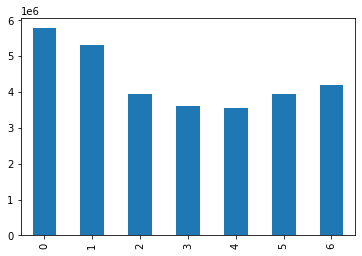

In [16]:
# Create bar chart of orders_day_of_week frequency

bar_OrderDOW_frequency = ords_prods_cust['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [17]:
# Export bar chart

bar_OrderDOW_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_OrderDOW_frequency.png'))

In [18]:
# Mark "prices" greater than $100 as NaN

ords_prods_cust.loc[ords_prods_cust['prices'] > 100, 'prices'] = np.nan

In [19]:
# Check replacement was successful - find max value of "price" column

ords_prods_cust['prices'].max()

25.0

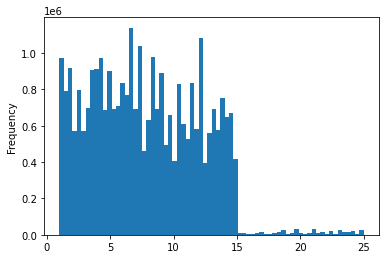

In [20]:
# Create histogram of prices column

hist_prices = ords_prods_cust['prices'].plot.hist(bins = 70)

In [21]:
# Export histogram to Visualizations folder

hist_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

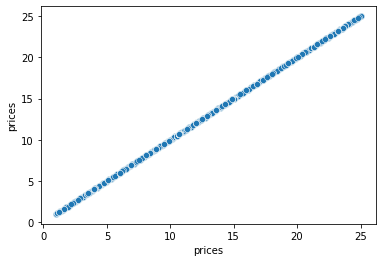

In [22]:
# Create scatterplot of prices column

scatterplot_prices = sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_cust)

In [23]:
# Export scatterplot to Visualizations folder

scatterplot_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_prices.png'))

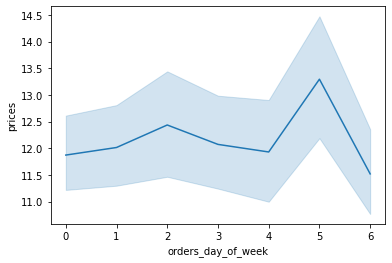

In [24]:
# Create line chart of prices and orders_day_of_week using small sample

line_OrderDOW_prices = sns.lineplot(data = small, x = 'orders_day_of_week',y ='prices')

In [25]:
# Export line chart to Visualizations folder

line_OrderDOW_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_OrderDOW_prices.png'))

## 04. Create a histogram of “order_hour_of_day” column

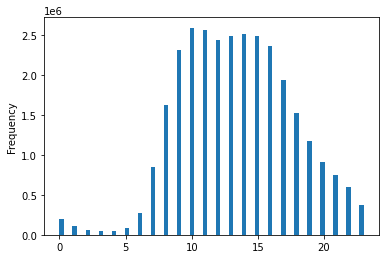

In [26]:
# Create histogram of prices column

hist_OrderHourOfDay = ords_prods_cust['order_hour_of_day'].plot.hist(bins = 70)

#### This demonstrates that most orders are placed beween 9:00AM and 4:00PM, with the higest traffic time for orders at 10:00AM.

In [27]:
# Export histogram to Visualizations folder

hist_OrderHourOfDay.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_OrderHourOfDay.png'))

## 05. Create a bar chart from the “loyalty_flag” column

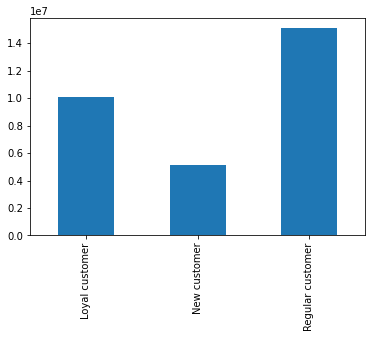

In [28]:
# Create bar chart of loyalty_flag frequency

bar_loyalty_flag_frequency = ords_prods_cust['loyalty_flag'].value_counts().sort_index().plot.bar()

In [29]:
# Export bar chart to Visualizations folder

bar_loyalty_flag_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag_frequency.png'))

## 06. Create a line chart of prices by order_hour_of_day

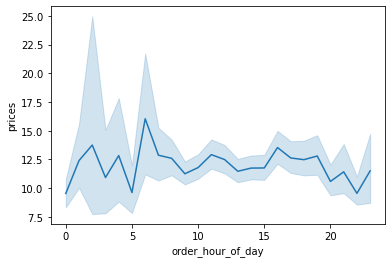

In [30]:
# Create line chart of prices and order_hour_of_day using small sample

line_OrderHoD_prices = sns.lineplot(data = small, x = 'order_hour_of_day',y ='prices')

In [31]:
# Export line chart to Visualizations folder

line_OrderHoD_prices.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_OrderHoD_prices.png'))

## 07. Create a line chart of number_of_dependants by age

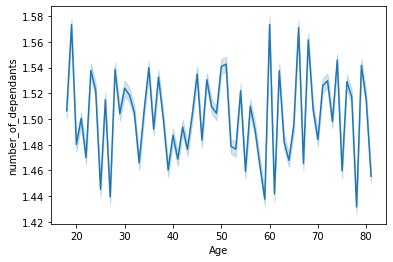

In [32]:
line_Age_dependants = sns.lineplot(data = small, x = 'Age', y ='number_of_dependants')

#### This shows there is not a direct correlation between age and number of dependants.

In [33]:
# Export line chart to Visualizations folder

line_Age_dependants.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_Age_dependants.png'))

## 08. Create a scatterplot of average spending by age

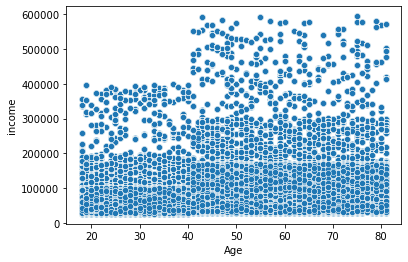

In [34]:
# Create a scatterplot of income by age using small sample set of data

scatterplot_income_Age = sns.scatterplot(x = 'Age', y = 'income', data = small)

#### Assuming income equates to spending power, this shows there is more spending power with older customers.

In [35]:
# Export scatterplot to Visualizations folder

scatterplot_income_Age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot_income_Age.png'))

## 09. Export data

In [36]:
# Export ords_prods_cust to Prepared data folder

ords_prods_cust.to_pickle(os.path.join(r'C:\Users\lrutl\OneDrive\Desktop\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_cust.pkl'))